In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2

import os

In [2]:
def load_fer2013(filename='fer2013/fer2013.csv'):
    df = pd.read_csv(filename, sep=',',header=0)
    images = []
    labels = []
    for each in df['pixels'].tolist():
        pom = np.array(each.split(' '))
        pom = np.reshape(pom, (48,48))
        images.append(pom.astype(np.float))
    for each in df['emotion'].tolist():
        labels.append(int(each))
    return images, labels

In [3]:
'''
FER2013 emotion abels:
0 - Angry
1 - Disgust
2 - Fear
3 - Happy
4 - Sad
5 - Surprise
6 - Neutral
'''
fer_images, fer_labels = load_fer2013()

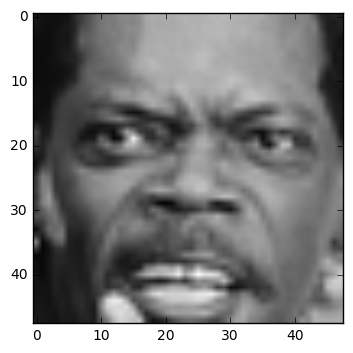

In [4]:
plt.imshow(fer_images[10], cmap = 'gray')
plt.show()

In [5]:
'''
CC emotion labels:
1 - Angry 45
2 - Contempt 18
3 - Disgust 59
4 - Fear 25
5 - Happy 69
6 - Sadness 28
7 - Surprise 83
'''


def load_cohn_canade(rootdir='Cohn_canade\\extended-cohn-kanade-images\\',
                     rootdir2='Cohn_canade\\Emotion_labels\\Emotion'):
    f_img = []
    f_img_path = []
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            f_img_path.append(os.path.join(subdir, file))
            f_img.append(f_img_path[-1].split('\\')[-1].split('.')[0])


    f_lbl = []
    f_lbl_path = []
    for subdir, dirs, files in os.walk(rootdir2):
        for file in files:
            f_lbl_path.append(os.path.join(subdir, file))
            f_lbl.append(f_lbl_path[-1].split('\\')[-1].split('.')[0][:-8])

    label = []
    image = []
    for i in range(len(f_lbl)):
        for j in range(len(f_img)):
            if f_lbl[i] == f_img[j]:
                label.append(int(np.loadtxt(f_lbl_path[i])))
                image.append(cv2.imread(f_img_path[j],0))
    return label, image

In [6]:
cc_label, cc_image = load_cohn_canade()

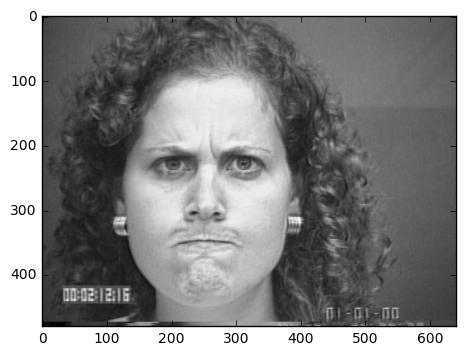

In [7]:
#resized_image = cv2.resize(cc_image[-2], (48, 48)) 
plt.imshow(cc_image[-2], cmap = 'gray')
plt.show()

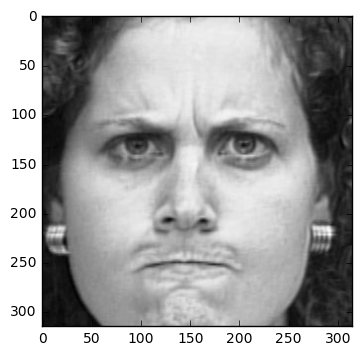

In [8]:
# HAAR Cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cc_image[-2][:,:]
face = face_cascade.detectMultiScale(img, 1.3, 5)
for (x,y,w,h) in face:
    img = img[x:x+w, y:y+h]
plt.imshow(img, cmap = 'gray')
plt.show()

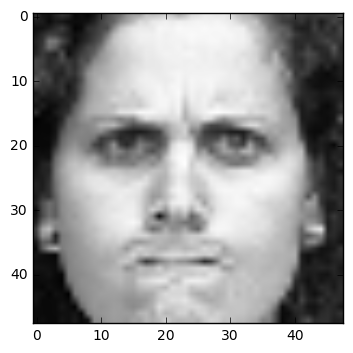

In [9]:
# 48x48

resized_image = cv2.resize(img, (48, 48)) 
plt.imshow(resized_image, cmap = 'gray')
plt.show()